In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

In [90]:
df = pd.read_csv("cleaned_dataset.csv")

In [92]:
df

,Date,Food Item,Quantity Donated,Quantity Requested,Expiration Date,Seasonality,Holidays,Market Prices,Disaster Events,Recipient Preferences,...,Food Waste Rate,Distance Traveled (km),Transportation Mode,Storage Duration (days),Energy Used in Storage (kWh),Carbon Footprint,Fuel Type,Logistics Cost,Packaging Type,Refrigeration Required
0,1126,3,1.743647,0.008241,1309,-0.217808,-1.087845,-0.207863,1.922821,1.718779,...,0.053643,1.000423,2,1.347030,0.828260,1.085385,1,1.527415,3,-0.596601
1,1459,5,0.003221,-0.480422,1553,-0.272135,0.919249,-1.360160,1.922821,1.718779,...,0.352994,1.606908,1,0.364281,-0.021471,1.020734,1,1.889967,3,-0.596601
2,860,1,1.818024,1.742650,1112,-0.217808,0.919249,-0.002265,-0.407942,0.218121,...,-0.187317,-0.269210,3,1.715560,0.546732,0.590351,0,-0.001418,1,-0.596601
3,1294,3,-1.819020,-1.671107,1598,-0.360425,0.919249,-0.420316,-0.407942,1.343614,...,0.544058,-1.278498,1,0.241437,-0.632946,0.000000,1,-1.251428,0,-0.596601
4,1130,6,-1.759518,-1.292565,1245,-0.321825,0.919249,1.025198,-0.407942,-0.907373,...,3.274009,-0.353682,1,-1.601218,-1.068104,-0.724626,1,-0.779452,2,-0.596601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1401,6,1.699021,2.231312,1553,-0.336377,0.919249,-1.484390,-0.407942,-0.157044,...,4.837954,1.048890,4,-1.724061,-1.091263,0.000000,0,0.564297,1,-0.596601
19996,601,1,-0.718238,-0.432244,923,-0.454627,-1.087845,-0.208292,0.757440,-0.157044,...,-1.060552,0.219876,3,1.715560,3.957795,1.119575,0,0.705790,2,1.676163
19997,342,3,1.587455,0.008241,374,0.156209,0.919249,-0.709053,-0.407942,0.968450,...,-0.407924,0.358229,1,0.364281,-0.374996,0.026523,1,0.379223,3,-0.596601
19998,1797,5,-0.450480,-0.081232,1970,-0.067013,0.919249,1.323525,-0.407942,0.218121,...,0.780215,-1.197990,1,1.101342,-0.292632,-1.154801,1,-0.970529,2,-0.596601


# **Feature Selection :**

## Correlation Matrix

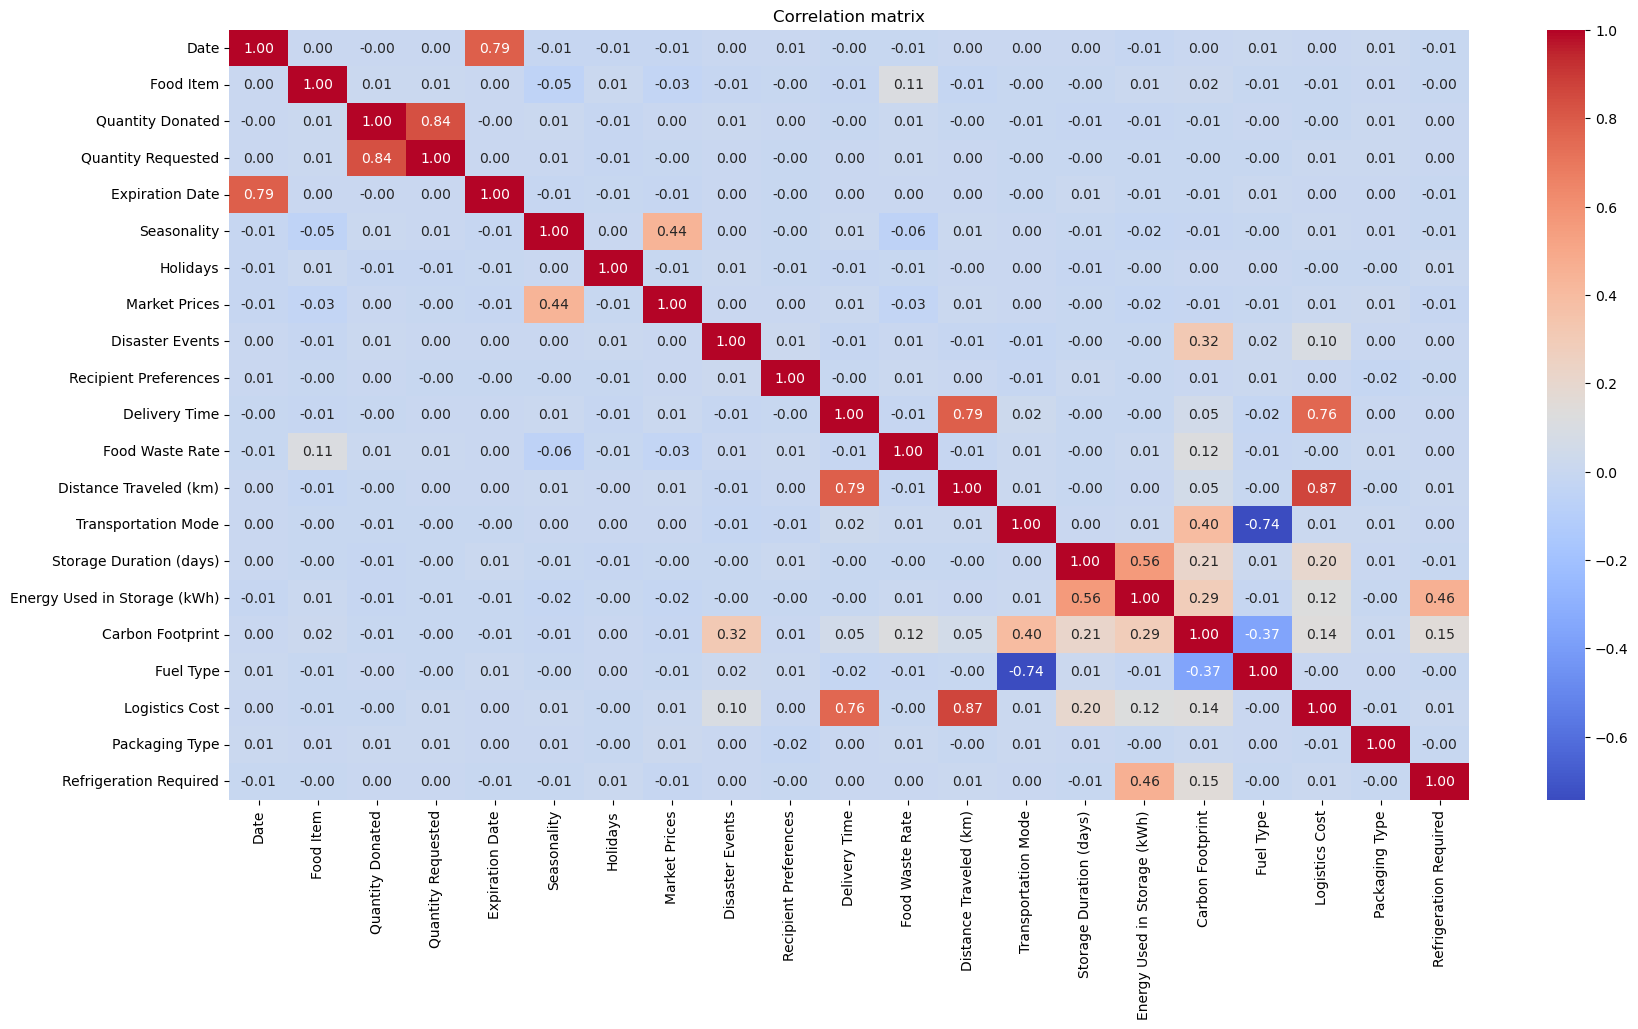

In [94]:
plt.figure(figsize=(20, 10))
corr_matrix = df.corr()  
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation matrix')
plt.show()

In [100]:
# Compute correlation
target = 'Carbon Footprint'
if target in df.columns:
    corr_matrix = df.corr()  # Compute correlation matrix
    print("\nCorrelation with the target before filtering :")
    print(corr_matrix[target].abs())  

    # Feature selection based on correlation
    correlation_threshold = 0.2  # More reasonable threshold
    target_corr = corr_matrix[target].abs()
    selected_features = target_corr[target_corr > correlation_threshold].index.tolist()
    
    if target in selected_features:
        selected_features.remove(target)

    print(f"\nSelected features correlated with {target} (|corr| > {correlation_threshold}) : \n{selected_features}")


Correlation with the target before filtering :
Date                            0.000088
Food Item                       0.016348
Quantity Donated                0.005652
Quantity Requested              0.001251
Expiration Date                 0.007245
Seasonality                     0.011218
Holidays                        0.001278
Market Prices                   0.009534
Disaster Events                 0.317830
Recipient Preferences           0.005444
Delivery Time                   0.049867
Food Waste Rate                 0.116039
Distance Traveled (km)          0.054154
Transportation Mode             0.397635
Storage Duration (days)         0.211655
Energy Used in Storage (kWh)    0.291699
Carbon Footprint                1.000000
Fuel Type                       0.367046
Logistics Cost                  0.138301
Packaging Type                  0.009317
Refrigeration Required          0.153141
Name: Carbon Footprint, dtype: float64

Selected features correlated with Carbon Footprint 

In [102]:
df_selected = df[selected_features]
print(df_selected.head())

   Disaster Events  Transportation Mode  Storage Duration (days)  \
0         1.922821                    2                 1.347030   
1         1.922821                    1                 0.364281   
2        -0.407942                    3                 1.715560   
3        -0.407942                    1                 0.241437   
4        -0.407942                    1                -1.601218   

   Energy Used in Storage (kWh)  Fuel Type  
0                      0.828260          1  
1                     -0.021471          1  
2                      0.546732          0  
3                     -0.632946          1  
4                     -1.068104          1  


In [66]:
X = df_selected 
y = df['Carbon Footprint'] 

In [68]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Train KNN Model
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict
y_pred_knn = knn.predict(X_test)

# Evaluate
knn_mse = mean_squared_error(y_test, y_pred_knn)
print(f"KNN MSE: {knn_mse}")

KNN MSE: 0.45074109066370577


In [72]:
from sklearn.svm import SVR

# Train SVM Model
svm = SVR(kernel='rbf')
svm.fit(X_train, y_train)

# Predict
y_pred_svm = svm.predict(X_test)

# Evaluate
svm_mse = mean_squared_error(y_test, y_pred_svm)
print(f"SVM MSE: {svm_mse}")


SVM MSE: 0.38524209149866456


In [74]:
print(f"KNN MSE: {knn_mse}")
print(f"SVM MSE: {svm_mse}")

if knn_mse < svm_mse:
    print("KNN performed better.")
else:
    print("SVM performed better.")


KNN MSE: 0.45074109066370577
SVM MSE: 0.38524209149866456
SVM performed better.


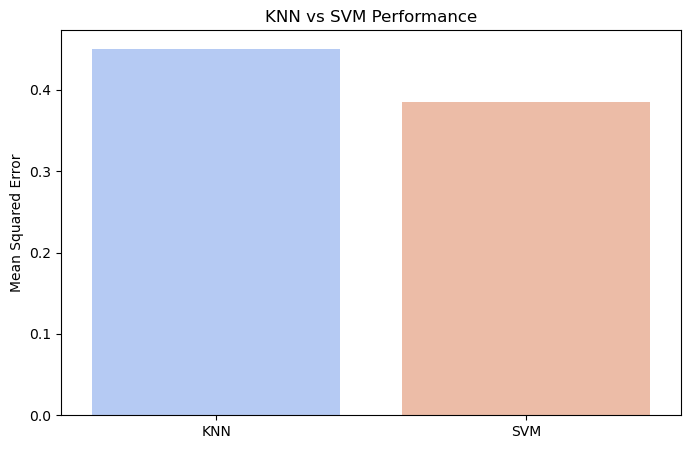

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
models = ['KNN', 'SVM']
mse_values = [knn_mse, svm_mse]

sns.barplot(x=models, y=mse_values, hue=models, palette="coolwarm", legend=False)
plt.ylabel("Mean Squared Error")
plt.title("KNN vs SVM Performance")
plt.show()